## Data/MC Comparison for Brem-Induced Clusters

#### Comparison of Clusters in Data vs MC. This is to validate the signal reconstruction process. We compare cluster from Z->MuMu events in Data vs those from a DY->ZMuMu (50-120 GeV for MLL). Both Data and MC are from 2023

In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT as rt
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector


Welcome to JupyROOT 6.28/00


In [2]:
with open('ME21_newMerge.npy', 'rb') as f:
    event_num_list = np.load(f)
print(len(event_num_list))

1514


In [3]:
data_path_2022 = "/uscms/home/amalbert/nobackup/CMSSW_10_6_20/src/run3_llp_analyzer/Run2022_L1_Eff_goodLumi.root"

data_TFile_trigEff_2022 = rt.TFile(data_path_2022)


data_tree_trigEff_2022 = data_TFile_trigEff_2022.Get("MuonSystem;2")

data_path_2023 = "/uscms/home/amalbert/nobackup/CMSSW_10_6_20/src/run3_llp_analyzer/Run2023_L1_Eff_goodLumi.root"

data_TFile_trigEff_2023 = rt.TFile(data_path_2023)


data_tree_trigEff_2023 = data_TFile_trigEff_2023.Get("MuonSystem;2")


Error in <TList::Clear>: A list is accessing an object (0x11a92ad0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b0bd70) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b139b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b13d20) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b14090) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b14400) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b14930) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b14cf0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b15650) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x11b15a

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


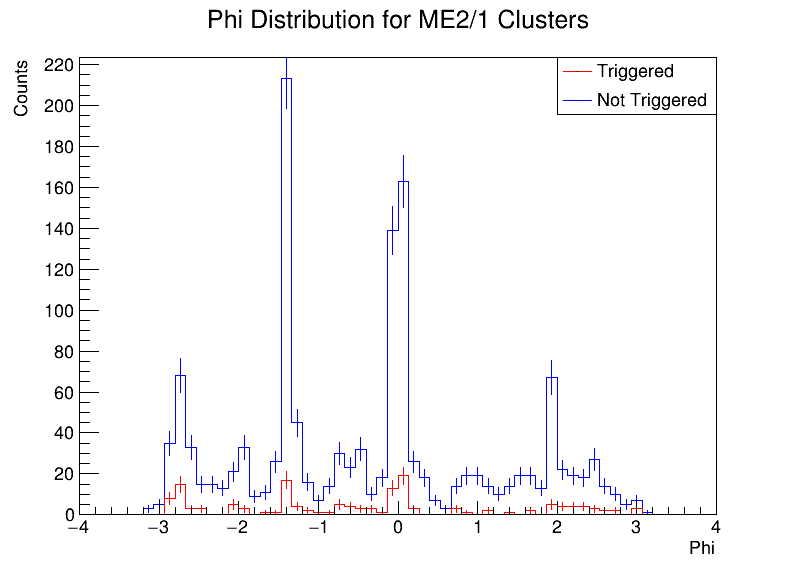

In [5]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Phi Distribution for ME2/1 Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=-4, xup=4)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=-4, xup=4)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
trigger_ME41_phi.SetLineColor(rt.kRed)

#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Phi")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


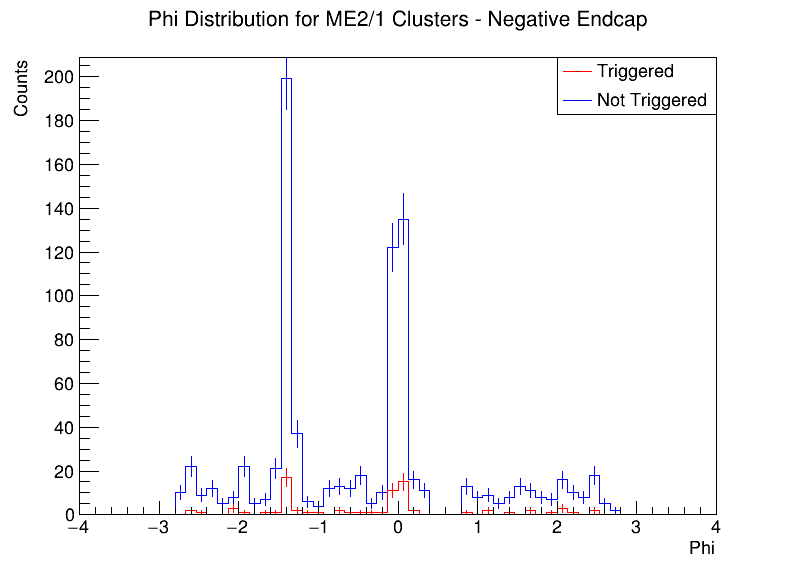

In [8]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Phi Distribution for ME2/1 Clusters - Negative Endcap")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=-4, xup=4)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=-4, xup=4)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff.cscRechitClusterEta[i]<0 and data_tree_trigEff.cscRechitClusterMuonVetoPt[i]<60):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff.cscRechitClusterEta[i]<0 and data_tree_trigEff.cscRechitClusterMuonVetoPt[i]<60):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
trigger_ME41_phi.SetLineColor(rt.kRed)

#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Phi")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


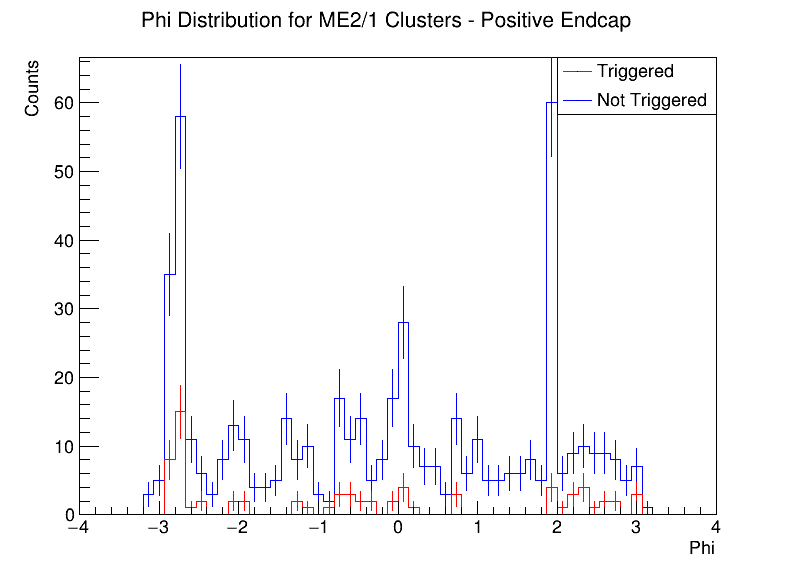

In [9]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Phi Distribution for ME2/1 Clusters - Positive Endcap")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=-4, xup=4)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=-4, xup=4)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff.cscRechitClusterEta[i]>0 and data_tree_trigEff.cscRechitClusterMuonVetoPt[i]<60):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff.cscRechitClusterEta[i]>0 and data_tree_trigEff.cscRechitClusterMuonVetoPt[i]<60):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
trigger_ME41_phi.SetLineColor(rt.kRed)

#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Phi")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


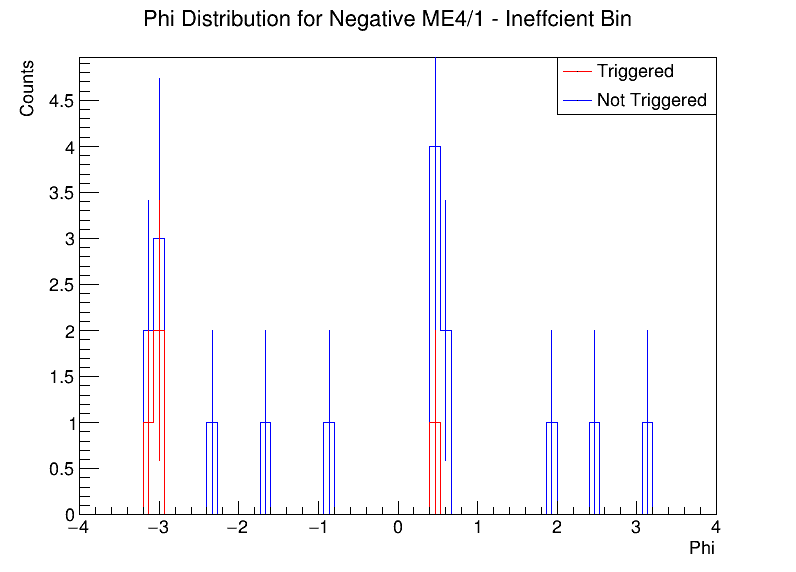

In [7]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Phi Distribution for Negative ME4/1 - Ineffcient Bin")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=-4, xup=4)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=-4, xup=4)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list_badBin: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterPhi[i])
trigger_ME41_phi.SetLineColor(rt.kRed)

#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Phi")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


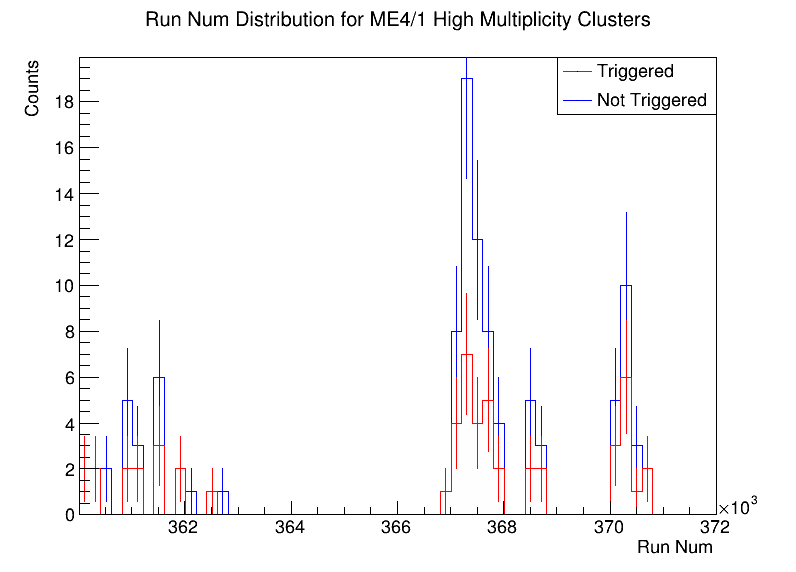

In [8]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Run Num Distribution for ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=60, xlow=360019, xup=372000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=60, xlow=360019, xup=372000)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.runNum)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.runNum)
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Run Num")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


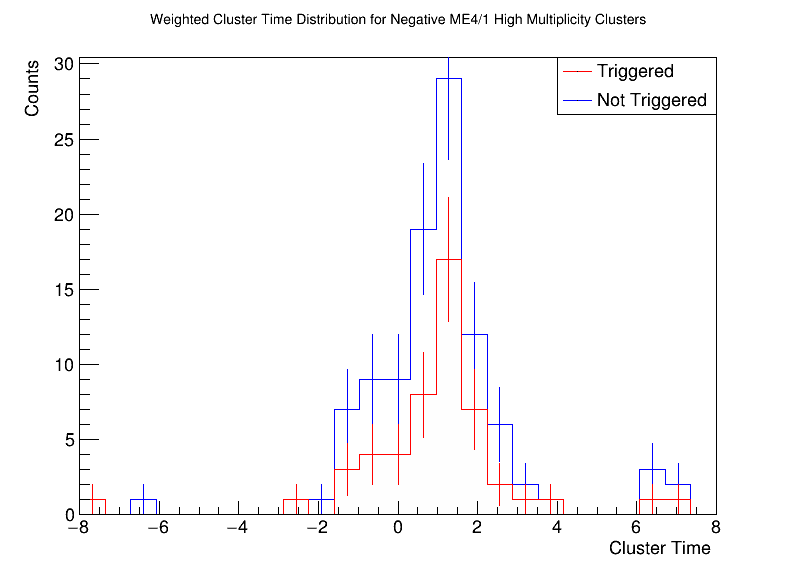

In [9]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Weighted Cluster Time Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=25, xlow = -8, xup=8)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=25, xlow = -8, xup=8)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


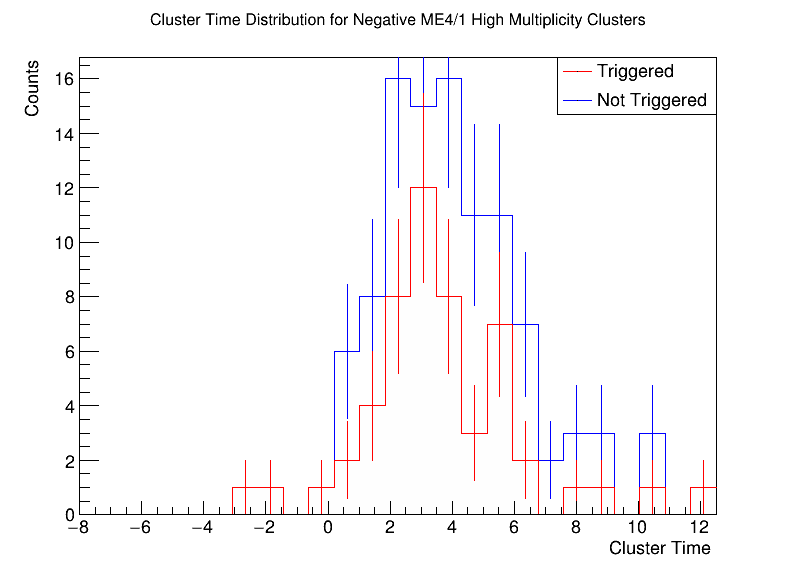

In [10]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Time Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=25, xlow = -8, xup=12.5)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=25, xlow = -8, xup=12.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTime[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTime[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


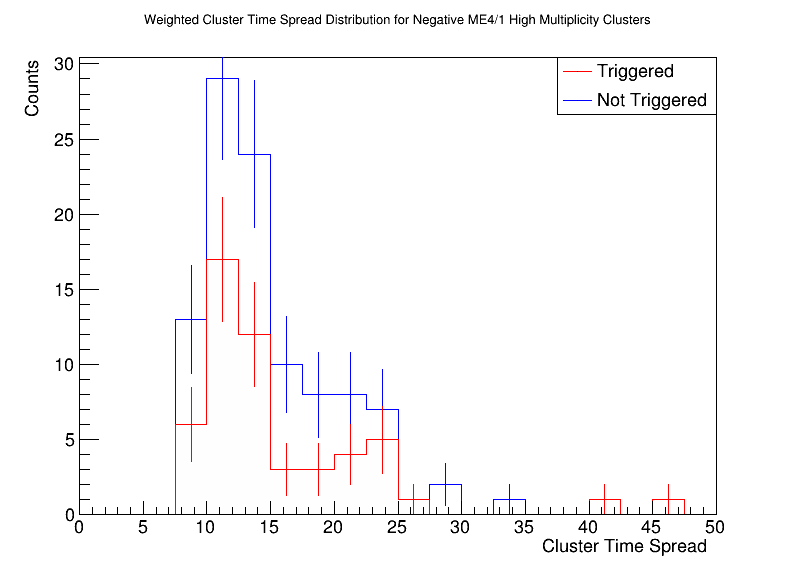

In [11]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Weighted Cluster Time Spread Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=20, xlow = 0, xup=50)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=20, xlow = 0, xup=50)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time Spread")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


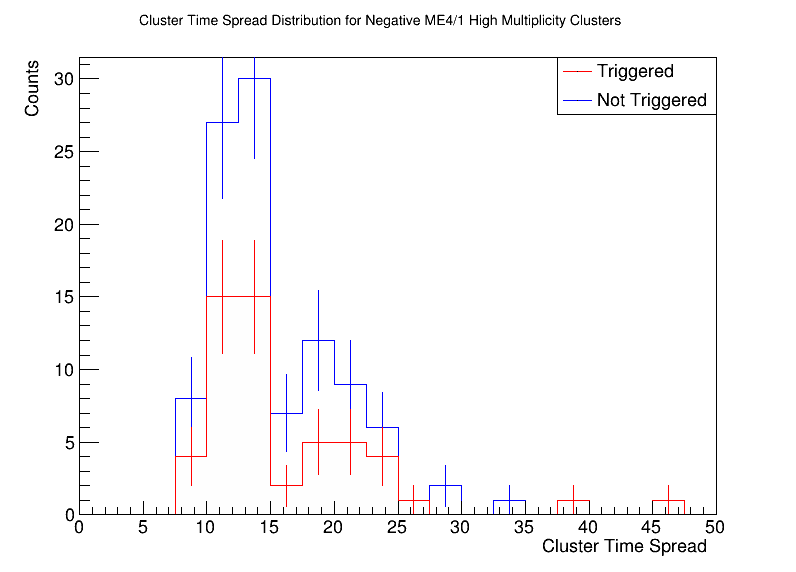

In [14]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Time Spread Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=20, xlow = 0, xup=50)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=20, xlow = 0, xup=50)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Time Spread")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


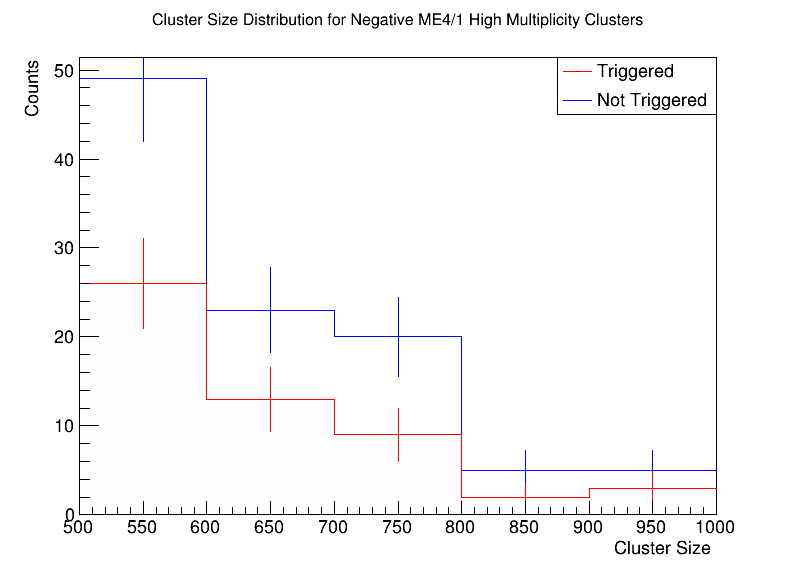

In [15]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Size Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 500, xup=1000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 500, xup=1000)
for data_tree_trigEff_1 in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff_1:
        if data_tree_trigEff_1.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff_1.L1_SingleMuShower_Nominal or data_tree_trigEff_1.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff_1.nCscRechitClusters):
                if (data_tree_trigEff_1.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_1.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_1.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff_1.cscRechitClusterSize[i])
        else:
            for i in range(data_tree_trigEff_1.nCscRechitClusters):
                if (data_tree_trigEff_1.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_1.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_1.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff_1.cscRechitClusterSize[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Size")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


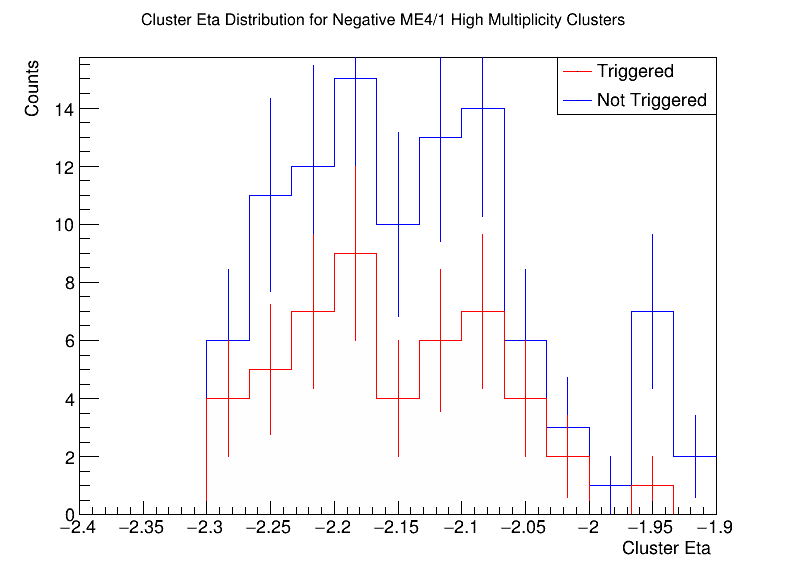

In [16]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Eta Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=15, xlow = -2.4, xup=-1.9)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=15, xlow = -2.4, xup=-1.9)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterEta[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterEta[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Eta")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


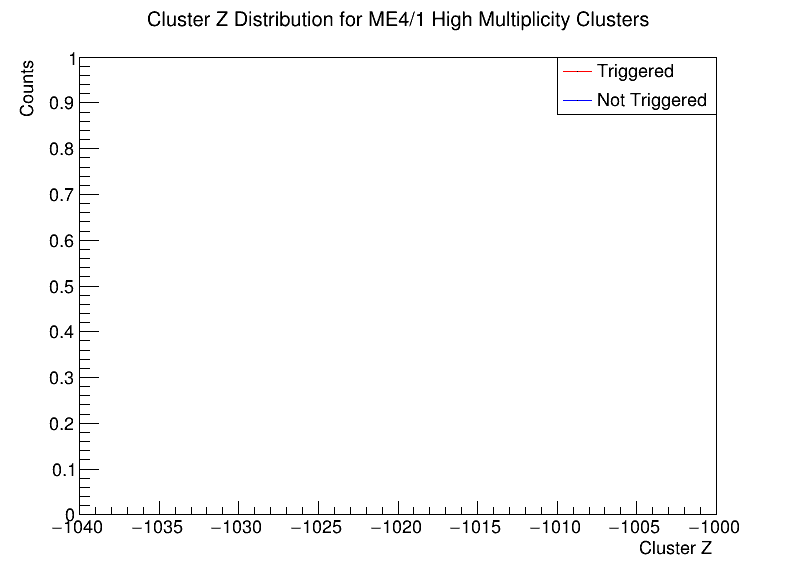

In [17]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Cluster Z Distribution for ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=30, xlow = -1040, xup=-1000)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=30, xlow = -1040, xup=-1000)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:    
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterZ[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterZ[i])
trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Cluster Z")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


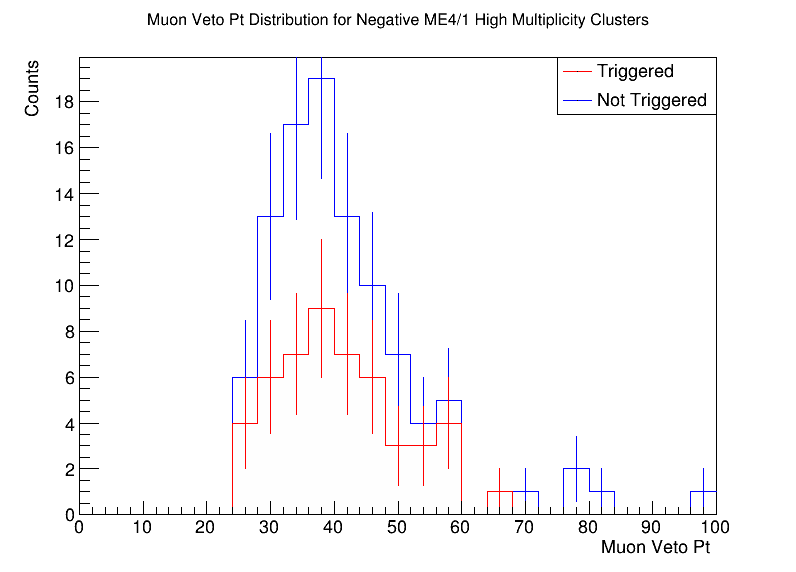

In [18]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Muon Veto Pt Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=25, xlow = 0, xup=100)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=25, xlow = 0, xup=100)

for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("Muon Veto Pt")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

19.00149917602539
11.417547225952148
30.483821868896484
40.50069808959961
39.96270751953125
99.54005432128906
4.899962425231934
18.893699645996094
71.56959533691406
31.856414794921875
37.78080368041992
69.05064392089844
45.15483856201172
42.32586669921875
63.37553024291992
81.44467163085938
25.150293350219727
7.229715347290039
75.30358123779297
19.54148292541504
77.68473052978516
12.736324310302734
37.19609069824219
18.01700782775879
22.35047721862793
43.237342834472656
43.224449157714844
40.56391143798828
27.343643188476562
17.098569869995117
17.856250762939453
48.38241195678711
60.821006774902344
99.72455596923828
11.603410720825195
52.44483184814453
45.55464553833008
113.76911926269531
46.52484130859375
86.42544555664062
76.64128112792969
41.42817306518555
26.015132904052734
63.57646179199219
66.44145202636719
47.67877960205078
62.10293197631836
30.063814163208008
94.69021606445312
85.8371810913086
64.95872497558594
78.96656799316406
25.16287612915039


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


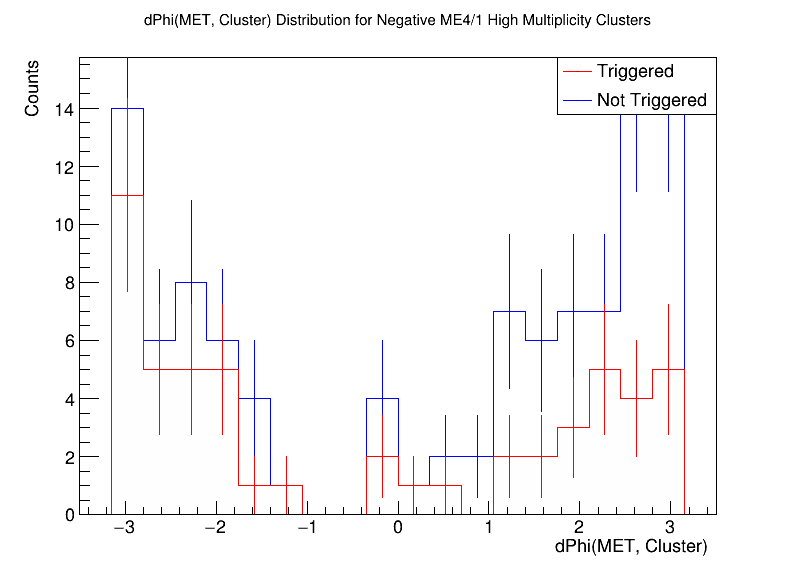

In [19]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","dPhi(MET, Cluster) Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=20, xlow = -3.5, xup=3.5)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=20, xlow = -3.5, xup=3.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("dPhi(MET, Cluster)")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


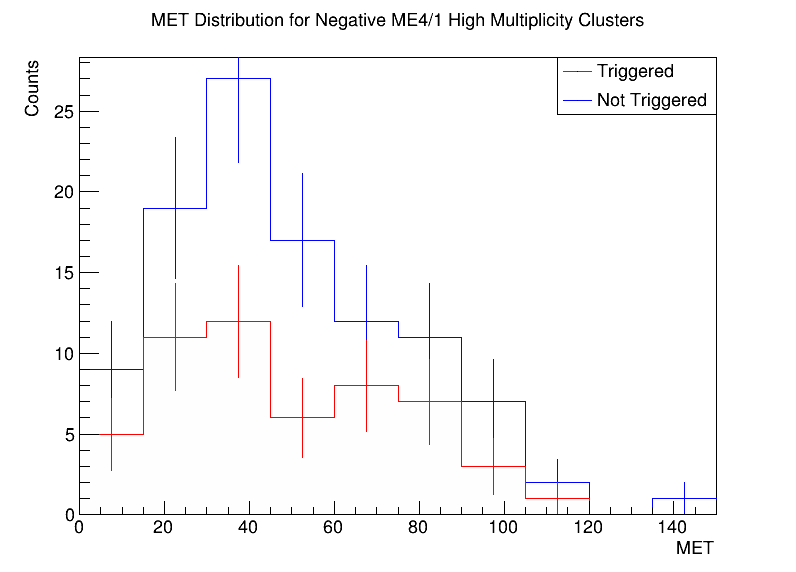

In [20]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=10, xlow = 0, xup=150)
not_trigger_ME41_phi = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=10, xlow = 0, xup=150)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    trigger_ME41_phi.Fill(data_tree_trigEff.met)
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    not_trigger_ME41_phi.Fill(data_tree_trigEff.met)

trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(trigger_ME41_phi)

not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
stack_inefficienct_phi.Add(not_trigger_ME41_phi)


stack_inefficienct_phi.Draw("HIST E0")

legend = rt.TLegend(0.9,0.8,0.7,0.9)
legend.AddEntry(trigger_ME41_phi, "Triggered")
legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
legend.Draw()

stack_inefficienct_phi.GetXaxis().SetTitle("MET")
stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


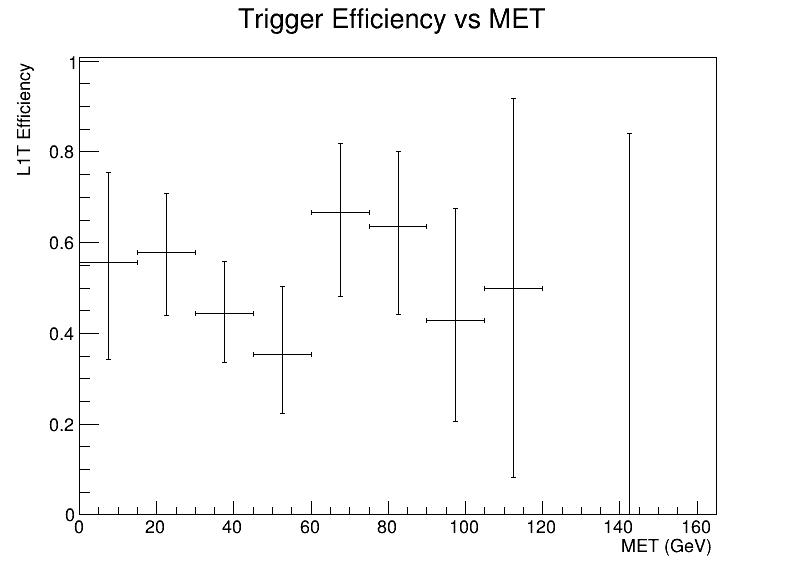

In [30]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=8, xlow = 0, xup=150)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=10, xlow = 0, xup=150)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.met)
                    denom.Fill(data_tree_trigEff.met)
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.met)

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs MET;MET (GeV);L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


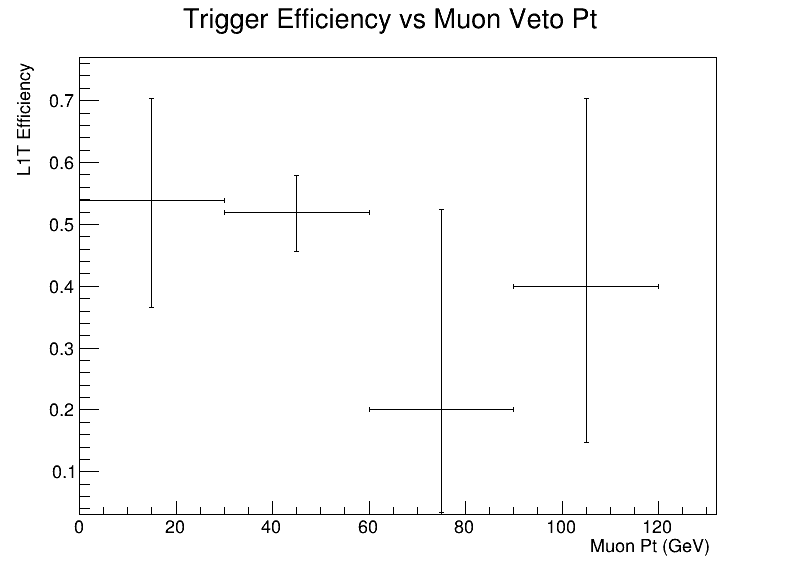

In [22]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","Muon Veto PT Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 0, xup=150)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 0, xup=150)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterMuonVetoPt[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Muon Veto Pt;Muon Pt (GeV);L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


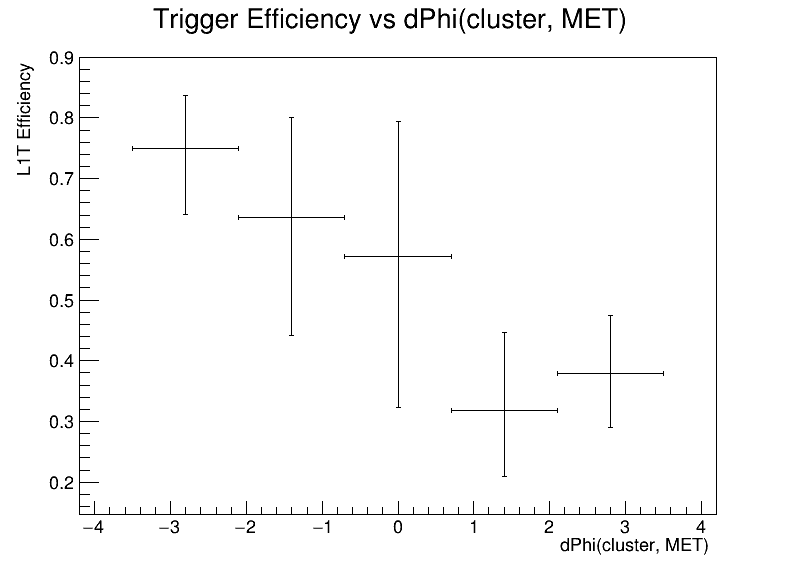

In [23]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = -3.5, xup=3.5)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = -3.5, xup=3.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterMet_dPhi[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs dPhi(cluster, MET);dPhi(cluster, MET);L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


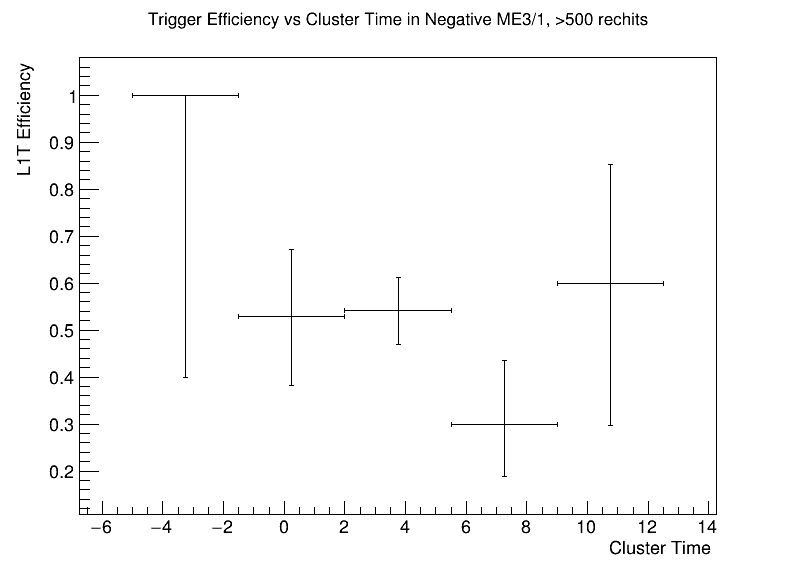

In [6]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME3/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME3/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = -5, xup=12.5)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME3/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = -5, xup=12.5)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterTime[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterTime[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterTime[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Cluster Time in Negative ME3/1, >500 rechits;Cluster Time;L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


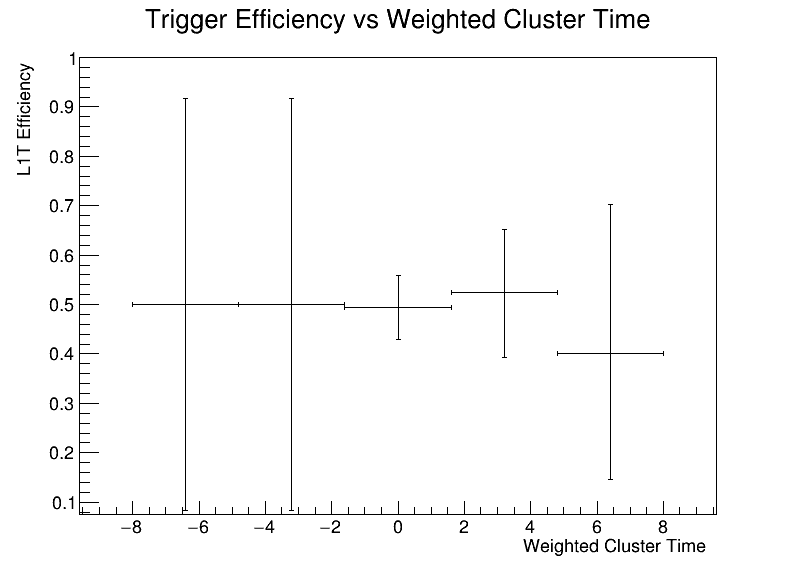

In [25]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = -8, xup=8)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = -8, xup=8)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Weighted Cluster Time;Weighted Cluster Time;L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


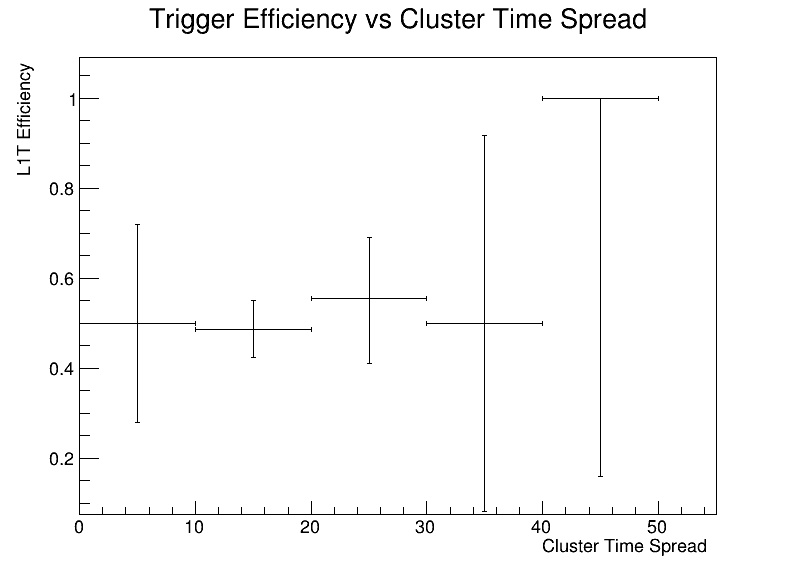

In [26]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 0, xup=50)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 0, xup=50)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Cluster Time Spread;Cluster Time Spread;L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


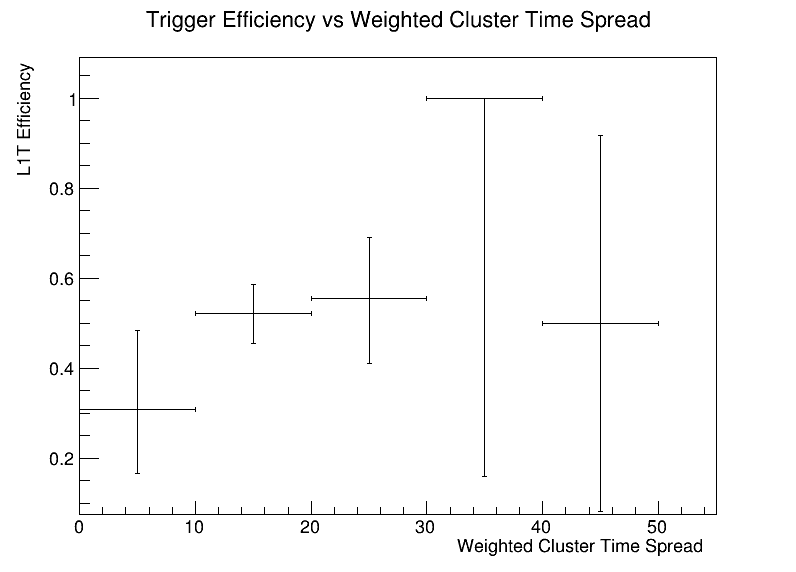

In [27]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = 0, xup=50)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = 0, xup=50)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterTimeSpread[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeSpreadWeightedAll[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Weighted Cluster Time Spread;Weighted Cluster Time Spread;L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

tree
tree


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: Phi for Trigger Events (Potential memory leak).


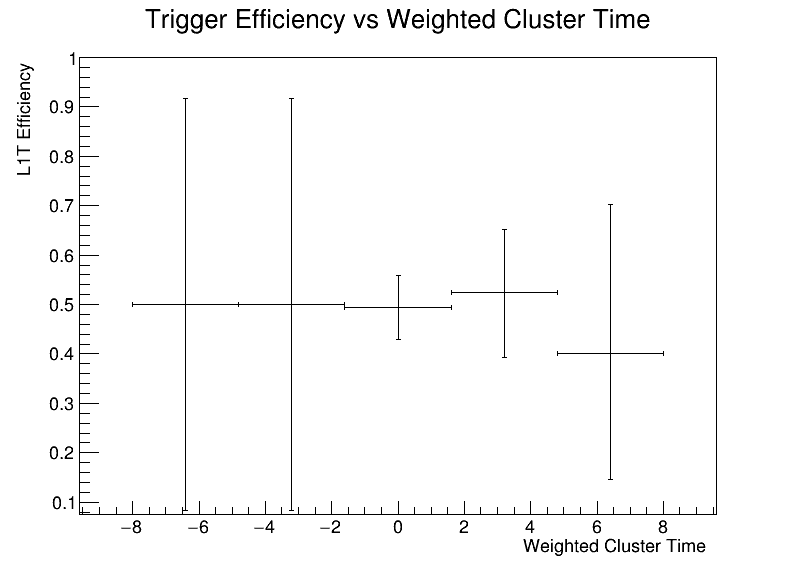

In [28]:
c = rt.TCanvas("c", "c", 800, 600)
stack_inefficienct_phi = rt.THStack("stack","MET Distribution for Negative ME4/1 High Multiplicity Clusters")
num = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Triggered", nbinsx=5, xlow = -8, xup=8)
denom = rt.TH1F("Phi for Trigger Events", "Phi Distribution for ME4/1 Inefficient Clusters - Not Triggered", nbinsx=5, xlow = -8, xup=8)
for data_tree_trigEff in [data_tree_trigEff_2022, data_tree_trigEff_2023]:
    print("tree")
    for entry in data_tree_trigEff:
        if data_tree_trigEff.evtNum not in event_num_list: 
            continue
        if data_tree_trigEff.L1_SingleMuShower_Nominal or data_tree_trigEff.L1_SingleMuShower_Tight:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    num.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])
                    #print(data_tree_trigEff.met)
        else:
            for i in range(data_tree_trigEff.nCscRechitClusters):
                if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
                    denom.Fill(data_tree_trigEff.cscRechitClusterTimeWeighted[i])

#trigger_ME41_phi.SetLineColor(rt.kRed)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(trigger_ME41_phi)

#not_trigger_ME41_phi.SetLineColor(rt.kBlue)
#data_clusterSize.Scale(1/data_clusterSize.GetEntries())
#stack_inefficienct_phi.Add(not_trigger_ME41_phi)

eff = rt.TEfficiency(num, denom)
eff.SetStatisticOption(rt.TEfficiency.kFCP) 
    
    #current_plot = dump_chamber_efficiency_plot(chamber, num_hist, denom_hist, bins)
eff.SetTitle("Trigger Efficiency vs Weighted Cluster Time;Weighted Cluster Time;L1T Efficiency")
eff.Draw()
#stack_inefficienct_phi.Draw("HIST E0")

#legend = rt.TLegend(0.9,0.8,0.7,0.9)
#legend.AddEntry(trigger_ME41_phi, "Triggered")
#legend.AddEntry(not_trigger_ME41_phi, "Not Triggered")
#legend.Draw()

#stack_inefficienct_phi.GetXaxis().SetTitle("MET")
#stack_inefficienct_phi.GetYaxis().SetTitle("Counts")

c.Draw()

In [29]:
c = rt.TCanvas("c", "c", 800, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_ME41_clustersize = rt.TH1F("Weird Events Cluster Size", "Phi Distribution for ME4/1 Inefficient Clusters - 2022", nbinsx=60, xlow=-4, xup=4)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022 or data_tree_trigEff.L1_SingleMuShower_Nominal:
    if data_tree_trigEff_2022.evtNum not in event_num_list:
        continue
    for i in range(data_tree_trigEff.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i]):
            data_ME41_clustersize.Fill(data_tree_trigEff_2022.cscRechitClusterPhi[i])
            if data_tree_trigEff_2022.cscRechitClusterPhi[i]>3:
                print(data_tree_trigEff_2022.runNum)
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_ME41_clustersize.Draw("colz")
data_ME41_clustersize.SetStats(0)

stack_clusterSize.GetXaxis().SetTitle("Phi")
stack_clusterSize.GetYaxis().SetTitle("Count")

c.Draw()

360490
360950
360459
360927
361054
361971
361443
361512
361579
361579


NameError: name 'stack_clusterSize' is not defined

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [ ]:
c = rt.TCanvas("c", "c", 800, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_ME41_clustersize = rt.TH1F("Weird Events Cluster Size", "Eta Distribution for ME4/1 Inefficient Clusters", nbinsx=60, xlow=-1.7, xup=-2.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff:
    #if data_tree_trigEff.evtNum not in event_num_list or data_tree_trigEff.L1_SingleMuShower_Nominal:
    if data_tree_trigEff.evtNum not in event_num_list:
        continue
    for i in range(data_tree_trigEff.nCscRechitClusters):
        if (data_tree_trigEff.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff.cscRechitCluster_PassTimeVeto[i]):
            data_ME41_clustersize.Fill(data_tree_trigEff.cscRechitClusterEta[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_ME41_clustersize.Draw("colz")
data_ME41_clustersize.SetStats(0)

stack_clusterSize.GetXaxis().SetTitle("Eta")
stack_clusterSize.GetYaxis().SetTitle("Count")

c.Draw()

### Same type of Plots for TrigEff Data

In [ ]:
#paths
data_path_all = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_combined_updated/triggEff_2022_2023_goodlumi.root"

data_TFile_trigEff_all = rt.TFile(data_path_all)


data_tree_trigEff_all = data_TFile_trigEff_all.Get("MuonSystem")


data_path_2022 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_2022_updated/fixedMerge_trigEff_2022_052024_goodlumi.root"

data_TFile_trigEff_2022 = rt.TFile(data_path_2022)


data_tree_trigEff_2022 = data_TFile_trigEff_2022.Get("MuonSystem")


data_path_2023 = "/eos/uscms/store/user/amalbert/MDSTriggerEff/trigEff_output_2023_updated/trigEff_2023_052024_goodlumi.root"

data_TFile_trigEff_2023 = rt.TFile(data_path_2023)


data_tree_trigEff_2023 = data_TFile_trigEff_2023.Get("MuonSystem")


In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2023.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2023.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data", nbinsx=30, xlow = -3, xup=3, nbinsy=30, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    if data_tree_trigEff_2022.evtNum not in all_events_2022:
        continue
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.GetZaxis().SetRangeUser(0, 75);
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data", nbinsx=30, xlow = -3, xup=3, nbinsy=30, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    if data_tree_trigEff_2023.evtNum not in all_events_2023:
        continue
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.GetZaxis().SetRangeUser(0, 75);
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2022 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2022 Data, ME3/1 and ME4/1", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2022:
    for i in range(data_tree_trigEff_2022.nCscRechitClusters):
        if (data_tree_trigEff_2022.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2022.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2022.cscRechitCluster_PassTimeVeto[i] and abs(data_tree_trigEff_2022.cscRechitClusterZ[i])<915 and abs(data_tree_trigEff_2022.cscRechitClusterEta[i])>1.9 and data_tree_trigEff_2022.nCscRechitClusters==1):
            data_eta_phi_2022.Fill(data_tree_trigEff_2022.cscRechitClusterEta[i], data_tree_trigEff_2022.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2022.Draw("colz")
data_eta_phi_2022.SetStats(0)

data_eta_phi_2022.GetXaxis().SetTitle("Eta")
data_eta_phi_2022.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
c = rt.TCanvas("c", "c", 900, 600)
#stack_clusterSize = rt.THStack("stack","Cluster Eta")
data_eta_phi_2023 = rt.TH2F("Cluster Eta and Phi", "Cluster Eta and Phi Distribution for 2023 Data, ME3/1 and ME4/1", nbinsx=60, xlow = -3, xup=3, nbinsy=60, ylow=-3.5, yup=3.5)
#data_LeadingPt.Project("LeadingPt_Data", "LeadingPt")
for entry in data_tree_trigEff_2023:
    for i in range(data_tree_trigEff_2023.nCscRechitClusters):
        if (data_tree_trigEff_2023.cscRechitCluster_matchToProbeMuon[i] and data_tree_trigEff_2023.cscRechitCluster_passME1112Veto[i] and data_tree_trigEff_2023.cscRechitCluster_PassTimeVeto[i] and abs(data_tree_trigEff_2023.cscRechitClusterZ[i])>915 and abs(data_tree_trigEff_2023.cscRechitClusterEta[i])>1.9 and data_tree_trigEff_2023.nCscRechitClusters==1):
            data_eta_phi_2023.Fill(data_tree_trigEff_2023.cscRechitClusterEta[i], data_tree_trigEff_2023.cscRechitClusterPhi[i])
#data_clusterSize.SetLineColor(rt.kRed)
#data_eta_phi.Scale(1/data_eta_phi.GetEntries())
#gStyle.SetPalette(1)
data_eta_phi_2023.Draw("colz")
data_eta_phi_2023.SetStats(0)

data_eta_phi_2023.GetXaxis().SetTitle("Eta")
data_eta_phi_2023.GetYaxis().SetTitle("Phi")

c.Draw()

In [ ]:
data_tree_trigEff.Print("*Met*")